##Import Libraries

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

##Import Data

We are going to be using the Housing Data Prices on [Kaggle](https://https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?select=Housing.csv), and the goal here is to build and train a regression model that will in turn predict house prices based on a list of give features.

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/My Docs/ML ZoomCamp/Housing.csv')

In [ ]:
# data = 'https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?select=Housing.csv'

In [ ]:
# !wget $data

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##EDA

In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

price
[13300000 12250000 12215000 11410000 10850000]
219

area
[7420 8960 9960 7500 8580]
284

bedrooms
[4 3 5 2 6]
6

bathrooms
[2 4 1 3]
4

stories
[3 4 2 1]
4

mainroad
['yes' 'no']
2

guestroom
['no' 'yes']
2

basement
['no' 'yes']
2

hotwaterheating
['no' 'yes']
2

airconditioning
['yes' 'no']
2

parking
[2 3 0 1]
4

prefarea
['yes' 'no']
2

furnishingstatus
['furnished' 'semi-furnished' 'unfurnished']
3



In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


###Distribution of Prices

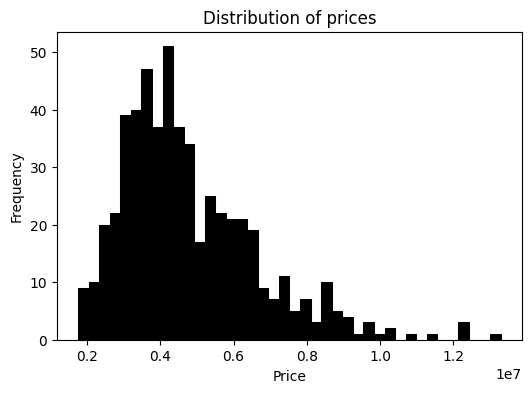

In [15]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

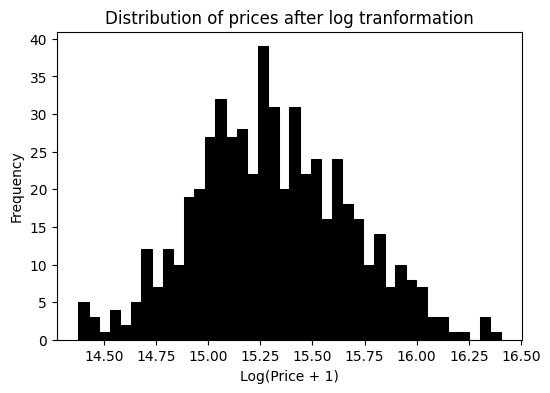

In [16]:
log_price = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

##Validation Framework

In [17]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n, n_val + n_test + n_train
n_val, n_test, n_train

(109, 109, 327)

In [18]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [19]:
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

len(y_train)

327

##Linear Regression

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w= XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [21]:
df_train.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [29]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
333,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished
84,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished
439,3930,2,1,1,no,no,no,no,no,0,no,unfurnished
396,3640,2,1,1,yes,no,no,no,no,1,no,semi-furnished
161,6100,3,1,3,yes,yes,no,no,yes,0,yes,semi-furnished


In [22]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [23]:
base = ['area', 'bedrooms', 'bathrooms', 'stories','parking']
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

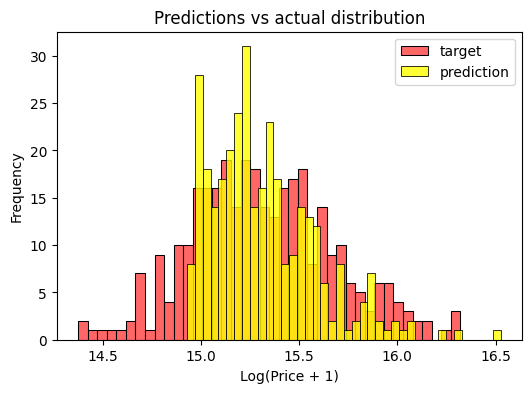

In [24]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='yellow', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

##RMSE

In [25]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [26]:
rmse(y_train, y_pred)

0.24756878963417944

###Validating the model

In [27]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [28]:
rmse(y_val, y_pred)

0.2392070666141687

##Feature Engineering - Categorical Variables

In [30]:
df[base].head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [31]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
333,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished
84,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished
439,3930,2,1,1,no,no,no,no,no,0,no,unfurnished
396,3640,2,1,1,yes,no,no,no,no,1,no,semi-furnished
161,6100,3,1,3,yes,yes,no,no,yes,0,yes,semi-furnished


In [40]:
df_train.nunique()

area                195
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [43]:
(df_train.furnishingstatus == "unfurnished").astype(int)

333    0
84     0
439    1
396    0
161    0
      ..
87     0
64     0
270    0
93     0
345    0
Name: furnishingstatus, Length: 327, dtype: int64

In [45]:
df_train.dtypes == 'object'

area                False
bedrooms            False
bathrooms           False
stories             False
mainroad             True
guestroom            True
basement             True
hotwaterheating      True
airconditioning      True
parking             False
prefarea             True
furnishingstatus     True
dtype: bool

In [50]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    for v in ['no', 'yes']:
        feature = 'mainroad_%s' % v
        df[feature] = (df['mainroad'] == v).astype(int)
        features.append(feature)

    for v in ['no', 'yes']:
        feature = 'guestroom_%s' % v
        df[feature] = (df['guestroom'] == v).astype(int)
        features.append(feature)

    for v in ['no', 'yes']:
        feature = 'basement_%s' % v
        df[feature] = (df['basement'] == v).astype(int)
        features.append(feature)

    for v in ['no', 'yes']:
        feature = 'hotwaterheating_%s' % v
        df[feature] = (df['hotwaterheating'] == v).astype(int)
        features.append(feature)

    for v in ['no', 'yes']:
        feature = 'airconditioning_%s' % v
        df[feature] = (df['airconditioning'] == v).astype(int)
        features.append(feature)

    for v in ['no', 'yes']:
        feature = 'prearea_%s' % v
        df[feature] = (df['prefarea'] == v).astype(int)
        features.append(feature)

    for v in ['semi-furnished', 'unfurnished', 'furnished']:
        feature = 'furnishingstatus_%s' % v
        df[feature] = (df['furnishingstatus'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [51]:
categorical_variables = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'
]

In [52]:
categories = {}

for c in categorical_variables:
  categories[c] = list(df[c].value_counts().head().index)

In [53]:
categories

{'mainroad': ['yes', 'no'],
 'guestroom': ['no', 'yes'],
 'basement': ['no', 'yes'],
 'hotwaterheating': ['no', 'yes'],
 'airconditioning': ['no', 'yes'],
 'parking': [0, 1, 2, 3],
 'prefarea': ['no', 'yes'],
 'furnishingstatus': ['semi-furnished', 'unfurnished', 'furnished']}

In [54]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

LinAlgError: Singular matrix

##Regularisation

In [55]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [56]:
X_train = prepare_X(df_train)

##Tuning the model

In [58]:
for r in [0.00001, 0.0001, 0.001, 1, 10]:
  X_train = prepare_X(df_train)
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

  y_pred = w_0 + X_train.dot(w)
  print('r:', r, 'train:', rmse(y_train, y_pred))

  X_val = prepare_X(df_val)
  y_pred = w_0 + X_val.dot(w)
  print('r:', r, 'val', rmse(y_val, y_pred))

r: 1e-05 train: 0.1996472774943943
r: 1e-05 val 0.20488996937537984
r: 0.0001 train: 0.19964727758449702
r: 0.0001 val 0.20488950469126577
r: 0.001 train: 0.1996472865956312
r: 0.001 val 0.2048848490609257
r: 1 train: 0.20797855719677605
r: 1 val 0.20679169109106615
r: 10 train: 0.495238673872027
r: 10 val 0.4406468067393189


In [59]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.1996472865956312
val 0.2048848490609257


#Using the model

In [60]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

In [61]:
X_full_train

array([[3000,    3,    1, ...,    1,    0,    0],
       [3760,    3,    1, ...,    1,    0,    0],
       [3930,    2,    1, ...,    0,    1,    0],
       ...,
       [3850,    3,    1, ...,    0,    1,    0],
       [6360,    3,    1, ...,    1,    0,    0],
       [4000,    3,    1, ...,    0,    0,    1]])

In [62]:
y_full_train = np.concatenate([y_train, y_val])

In [63]:
 w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [64]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.22141424917395533

In [65]:
i = 20
house = df_test.iloc[i].to_dict()
house

{'area': 4046,
 'bedrooms': 3,
 'bathrooms': 1,
 'stories': 2,
 'mainroad': 'yes',
 'guestroom': 'no',
 'basement': 'yes',
 'hotwaterheating': 'no',
 'airconditioning': 'no',
 'parking': 1,
 'prefarea': 'no',
 'furnishingstatus': 'semi-furnished'}

In [66]:
X_i = pd.DataFrame([house])

In [67]:
X_test = prepare_X(X_i)
y_pred = w_0 + X_test.dot(w)
y_actual = np.expm1(y_pred)[0]
y_actual

4256178.637872148

In [68]:
np.expm1(y_test[20])

4164999.999999998